In [1]:
!pwd

/home/william/code/ar10000/mountain_goat/notebooks


In [130]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mountain_goat.get_body_coordinates import get_pose_image

# cutting video into frames

In [3]:
filename ="cropped.mp4"
frame_list =[]
vidCap = cv2.VideoCapture(filename)
video_length = int(vidCap.get(cv2.CAP_PROP_FRAME_COUNT)) 
while vidCap.isOpened():
    success, frame = vidCap.read()
    if not success:
        break
    frame_list.append(frame)


# exploring frames

In [49]:
len(frame_list)
video_length

469

In [5]:
frame_list[100].shape

(1080, 608, 3)

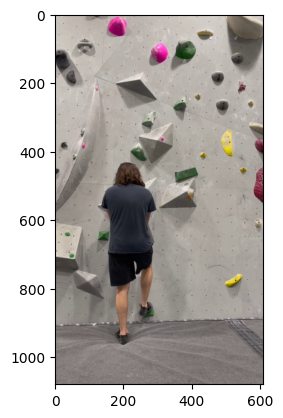

In [6]:
plt.imshow(frame_list[13][:, :, ::-1]);

In [7]:
def resize_image(image,scale):
    """resize image with a scale"""
    scale_percent = scale# percent of original size
    img= image
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized_image

In [8]:
resized_frame_list =[]
scale = 40
for image in frame_list:
    resized_image = resize_image(image, scale)
    resized_frame_list.append(resized_image)

(432, 243, 3)

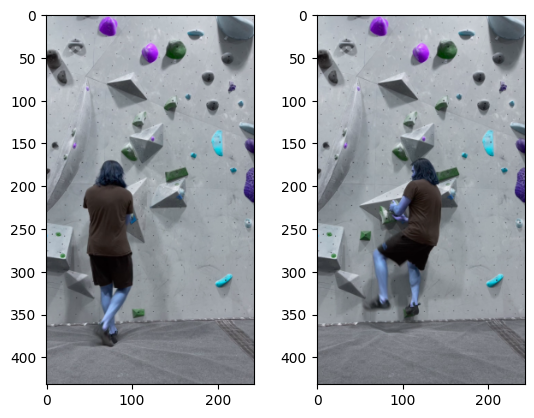

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(resized_frame_list[0])
ax[1].imshow(resized_frame_list[80])
resized_frame_list[0].shape

## flattening frames 

In [10]:
flattened_frames = []
for frame in resized_frame_list:
    im =frame.flatten()
    flattened_frames.append(im)
    

In [11]:
flattened_array = np.vstack(flattened_frames)

In [58]:
flattened_array.shape

(459, 314928)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial

In [14]:
similarity_vector = cosine_similarity(flattened_array)

In [25]:
# plt.figure(figsize=(16, 16))
# sns.heatmap(similarity_vector, linewidths=.5)


In [141]:
# similarity_vector[0]
np.array(list(get_pose_image(resized_frame_list[1]).values()))

array([0.29932439, 0.5001331 , 0.33679748, 0.52967775, 0.31184301,
       0.85631663, 0.27424395, 0.84526199])

In [148]:
disimilar_frames= []
length_video = len(resized_frame_list)
similarity_dict={}
for id, frame in enumerate(resized_frame_list):
    if id == length_video-1:
        break
    first_frame = frame # first frame
#     print(id)
    next_frame = resized_frame_list[id + 1] #next_frame
    # get_pose_image returns dict of coordinates , so here we change teh values(the coordinates)into an array for the first and 
    #next frame
    im_1_coordinates=np.array(list(get_pose_image(first_frame).values()))
    next_im_coordinates = np.array(list(get_pose_image(next_frame).values()))
    
    unit_vector_1 = im_1_coordinates / np. linalg. norm(im_1)
    unit_vector_2 = next_im_coordinates / np. linalg. norm(next_im)
    dot_product = np. dot(unit_vector_1, unit_vector_2)
    angle = np. arccos(dot_product)
    similarity = -1 * (spatial.distance.cosine(im_1_coordinates, next_im_coordinates) - 1)
    print(f'calculating similarity between frame{id} and frame{id +1} out of {len(resized_frame_list)} .....')
    similarity_dict[f'frame{id} vs frame{id +1}'] = [similarity, angle]
#     print(similarity)
    if similarity < 0.9999:
        disimilar_frames.append(next_frame)
    

calculating similarity between frame0 and frame1 out of 459 .....
calculating similarity between frame1 and frame2 out of 459 .....
calculating similarity between frame2 and frame3 out of 459 .....
calculating similarity between frame3 and frame4 out of 459 .....
calculating similarity between frame4 and frame5 out of 459 .....
calculating similarity between frame5 and frame6 out of 459 .....
calculating similarity between frame6 and frame7 out of 459 .....
calculating similarity between frame7 and frame8 out of 459 .....
calculating similarity between frame8 and frame9 out of 459 .....
calculating similarity between frame9 and frame10 out of 459 .....
calculating similarity between frame10 and frame11 out of 459 .....
calculating similarity between frame11 and frame12 out of 459 .....
calculating similarity between frame12 and frame13 out of 459 .....
calculating similarity between frame13 and frame14 out of 459 .....
calculating similarity between frame14 and frame15 out of 459 .....

calculating similarity between frame121 and frame122 out of 459 .....
calculating similarity between frame122 and frame123 out of 459 .....
calculating similarity between frame123 and frame124 out of 459 .....
calculating similarity between frame124 and frame125 out of 459 .....
calculating similarity between frame125 and frame126 out of 459 .....
calculating similarity between frame126 and frame127 out of 459 .....
calculating similarity between frame127 and frame128 out of 459 .....
calculating similarity between frame128 and frame129 out of 459 .....
calculating similarity between frame129 and frame130 out of 459 .....
calculating similarity between frame130 and frame131 out of 459 .....
calculating similarity between frame131 and frame132 out of 459 .....
calculating similarity between frame132 and frame133 out of 459 .....
calculating similarity between frame133 and frame134 out of 459 .....
calculating similarity between frame134 and frame135 out of 459 .....
calculating similari

calculating similarity between frame239 and frame240 out of 459 .....
calculating similarity between frame240 and frame241 out of 459 .....
calculating similarity between frame241 and frame242 out of 459 .....
calculating similarity between frame242 and frame243 out of 459 .....
calculating similarity between frame243 and frame244 out of 459 .....
calculating similarity between frame244 and frame245 out of 459 .....
calculating similarity between frame245 and frame246 out of 459 .....
calculating similarity between frame246 and frame247 out of 459 .....
calculating similarity between frame247 and frame248 out of 459 .....
calculating similarity between frame248 and frame249 out of 459 .....
calculating similarity between frame249 and frame250 out of 459 .....
calculating similarity between frame250 and frame251 out of 459 .....
calculating similarity between frame251 and frame252 out of 459 .....
calculating similarity between frame252 and frame253 out of 459 .....
calculating similari

calculating similarity between frame357 and frame358 out of 459 .....
calculating similarity between frame358 and frame359 out of 459 .....
calculating similarity between frame359 and frame360 out of 459 .....
calculating similarity between frame360 and frame361 out of 459 .....
calculating similarity between frame361 and frame362 out of 459 .....
calculating similarity between frame362 and frame363 out of 459 .....
calculating similarity between frame363 and frame364 out of 459 .....
calculating similarity between frame364 and frame365 out of 459 .....
calculating similarity between frame365 and frame366 out of 459 .....
calculating similarity between frame366 and frame367 out of 459 .....
calculating similarity between frame367 and frame368 out of 459 .....
calculating similarity between frame368 and frame369 out of 459 .....
calculating similarity between frame369 and frame370 out of 459 .....
calculating similarity between frame370 and frame371 out of 459 .....
calculating similari

In [149]:
len(disimilar_frames)

193

In [158]:
similarity_dict

{'frame0 vs frame1': [0.9998678706274202, 1.5660549977813005],
 'frame1 vs frame2': [0.999811101592367, 1.5660705478720733],
 'frame2 vs frame3': [0.9992569905986658, 1.5660306057799893],
 'frame3 vs frame4': [0.9998049012920573, 1.565952692997106],
 'frame4 vs frame5': [0.9994868651423015, 1.5658156700185837],
 'frame5 vs frame6': [0.9995026795240466, 1.5656651065902847],
 'frame6 vs frame7': [0.9999073647648659, 1.565604618068093],
 'frame7 vs frame8': [0.9997979885426728, 1.5656833451694372],
 'frame8 vs frame9': [0.9999059584779317, 1.5656924930217337],
 'frame9 vs frame10': [0.9998991041652582, 1.5655944794954908],
 'frame10 vs frame11': [0.9998246820453642, 1.5655966315521521],
 'frame11 vs frame12': [0.9999382499164109, 1.5656415460499573],
 'frame12 vs frame13': [0.9999588315150911, 1.565619232734728],
 'frame13 vs frame14': [0.9999626899175779, 1.565619402129612],
 'frame14 vs frame15': [0.9999510483806454, 1.5655860670828647],
 'frame15 vs frame16': [0.9999606612206187, 1.565

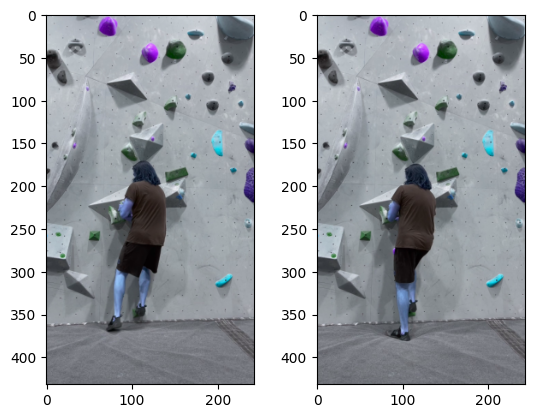

In [161]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(disimilar_frames[14])
ax[1].imshow(disimilar_frames[15])
# def show_images(list_images):
#     """show the images"""
#     nrows = int(len(list_images)/2) +1
#     ncols = int(len(list_images)/2) +1
#     fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))
#     for row in range(nrows):
#         for col in range(ncols):
#             for image in list_images:
#                 ax[row, col].imshow(image)

# show_images(disimilar_frames)